# Chicago Traffic Crash Analysis

## Overview
This project analyzes traffic crash data from Chicago's Open Data Portal to identify patterns and factors contributing to fatal and serious vehicle crashes. By leveraging datasets on crash incidents, involving people, and vehicles, the analysis provides actionable insights into high-risk conditions and behaviors. The results aim to inform public safety initiatives and reduce traffic incidents through data-driven decisions.


<img src="./images/chicago_header_image.jpg" width="1280" height="640">

*Photo by [Sawyer Bengtson](https://unsplash.com/@sawyerbengtson) on Unsplash*
___

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Goals](#Goals)
* 1.3 [Success Criteria](#Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)


### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)


### 6. [Evaluation](#Evaluation)

### 7. [Conclusion](#Conclusion)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [References](#References)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

In 2023, Chicago recorded 136 traffic deaths ([CDOT, 2024](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D)), a sobering reminder of the persistent challenges the city faces in ensuring road safety. Despite efforts from various cities across the U.S., traffic fatalities continue to be a major issue. In response, Chicago introduced its [Vision Zero](https://visionzeronetwork.org/about/what-is-vision-zero/) Action Plan in June 2017, committing to the shared goal of eliminating traffic fatalities and serious injuries on the city’s streets by 2026 ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)).

Traffic safety is not only a public health issue but also an equity concern, as Black and Brown communities, particularly in cities like Chicago and Philadelphia, suffer disproportionately from traffic fatalities.  In Philadelphia, zip codes with higher poverty rates see more crash hospitalizations ([City of Philadelphia, 2024](https://visionzerophl.com/plans-and-reports/annual-report-2024/)). These communities often face underinvestment in infrastructure, compounding the challenges they face in reducing fatalities and injuries.

Experts agree traffic fatalities are preventable. The Vision Zero Chicago Action Plan emphasizes that crashes are “predictable and preventable” events, with speed being a leading factor in severe accidents ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)). Reducing speed is critical but requires addressing driver behavior through strategies like speed cushions, narrower lanes, and lower speed limits—though their effectiveness is debated.

Through my involvement with the City of Philadelphia’s Vision Zero Ambassadors program, I gained valuable experience engaging underserved communities, raising awareness, and understanding the importance of data-driven interventions to reduce fatalities.

### 1.2 <a name ="Goals"></a> Goals

The goal of this project is to use crash data from CDOT's Open Data Portal to develop a model that predicts whether a crash resulted in serious injuries. For the purposes of this project, ‘serious’ injuries refer to both fatalities and ‘incapacitating’ injuries. CDOT defines incapacitating injuries as: *'injuries that prevent an individual from walking, driving, or performing normal activities'*.

With the focus on using the model's predictions to identify contributing factors in serious crashes, this project is inherently attempting to verify CDOT’s claim that speed is a key factor in the severity of crashes, as outlined in their [2024 Annual Traffic Report](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D). By analyzing speed alongside other factors such as road conditions, road design, enforcement, and vehicle type and size, the model will provide valuable insights into how these elements contribute to traffic fatalities and serious injuries.

The model will be designed to be easily interpretable, meaning it will provide clear and understandable explanations for how it arrives at its predictions. This is crucial for decision-makers, as it allows them to trust the model’s results and use it to guide traffic safety policies and resource allocation. An easily interpretable model will help agencies like CDOT and the Chicago Metropolitan Agency for Planning (CMAP) target resources more effectively, allow policymakers to evaluate the impact of different safety strategies, and help make informed decisions about where to focus their efforts. Ultimately, this model will assist in making data-driven decisions that reduce fatalities and improve the overall safety of Chicago’s roadways.

### 1.3 <a name ="Success-Criteria"></a> Success Criteria

The success of this project will be measured by how effectively the model explains its predictions and identifies key features driving serious crashes. Due to the significant class imbalance, where serious crashes are much less frequent than non-serious ones, traditional metrics like accuracy are not suitable. Instead, the focus will be on Precision-Recall Area Under the Curve (PR AUC), which better evaluates performance for the minority class—serious crashes.

PR AUC is the primary metric because it effectively evaluates performance for the minority class (serious crashes), which is crucial given the class imbalance. By focusing on the minority class, the PR curve helps diagnose the model’s ability to identify serious crashes, balancing precision and recall. Additional metrics, such as recall, precision, and the confusion matrix, will be used for further evaluation. However, PR AUC will guide model optimization and selection.

By optimizing PR AUC, this project aims to help local government and planning agencies, such as CDOT and CMAP, identify key contributors to serious crashes and improve data-driven decision-making for traffic safety.

## 2. <a name ="Data-Understanding"></a> Data Understanding

The data for this project came from the city of [Chicago's Data Portal](https://data.cityofchicago.org/). The datasets involved are updated regularly, with the most recent update on Dec 12, 2024, and the earliest recorded data dating back to March 2023. More on each dataset:
1. [Traffic Crashes - Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data): Contains detailed information about each traffic crash that occurred within the City of Chicago.
    * Total of **901k** observations with **48** features.
        * Includes fields such as crash date, crash location, weather conditions, road conditions, and contributing factors like speed limits.
    * Unique identifier for each crash is the `CRASH_RECORD_ID`.
    * Target class: `MOST_SEVERE_INJURY`
        * Includes 5 classes: 
             * *NO INDICATION OF INJURY*
             * *NONINCAPACITATING INJURY*
             * *REPORTED, NOT EVIDENT*
             * *INCAPACITATING INJURY*
             * *FATAL*
<br><br>

2. [Traffic Crashes - People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data): Provides information about individuals involved in a traffic crash, including details about their injuries 
    * Total of **1.98M** observations with **29** features.
        * Each record corresponds to an occupant in a vehicle listed in the Crash dataset, and it includes data such as the type of injury, role (driver, passenger, pedestrian, etc.), and whether the individual sustained any injuries.
    * Links to `Crash` dataset using the `CRASH_RECORD_ID` and `Vehicles` using `VEHICLE_ID`. 
    * Unique identifier for each person: `PERSON_ID` 
<br><br>

3. [Traffic Crashes - Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data): Contains information about the vehicle(s) involved in traffic crashes. 
   
    * Total of **1.84M** observations with **71** features.
        * Each “unit” involved in a crash (e.g., motor vehicles, bicycles, pedestrians) is assigned a record. 
        * Information about the vehicle type, damage, and trajectory, as well as the relationship with the individuals involved (drivers, passengers, pedestrians).
        
    * Links to the `Crash` and `People` datasets using the `CRASH_RECORD_ID`. 
    
    


### 2.1 Reproducibility

#### 2.1.1 Importing Necessary Libraries

In [1]:
# for getting data
import os
import zipfile
import os
import zipfile
import json
from pathlib import Path

# for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Use this for imbalanced learning pipelines
from sklearn.model_selection import GridSearchCV

# for evaluation
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# for class imbalance
from imblearn.over_sampling import SMOTE

#### 2.1.2 Environment Setup and data loading

For trying to be able to get this code to run in google colab for reproducibility 

Please be aware that running this code will require you to enter your kaggle username and API key. The code will not proceed if you do not provide accurate information. 

To create a kaggle account, [click here](https://www.kaggle.com/account/login). 

For more details on obtaining your kaggle API key, [click here](https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md).

In [2]:
# Getting Kaggle username and key from user input or environment variables
os.environ["KAGGLE_USERNAME"] = input("Enter Kaggle username: ")
os.environ["KAGGLE_KEY"] = input("Enter Kaggle key: ")

# Detect the environment (Google Colab or local machine)
if 'google.colab' in str(get_ipython()):
    # For Google Colab, use the /root/.kaggle directory
    kaggle_path = Path('/root/.kaggle')
else:
    # For local machine, use the home directory
    kaggle_path = Path.home() / '.kaggle'

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_path, exist_ok=True)

# Create the kaggle.json file with the correct API credentials
kaggle_json = {
    "username": os.getenv("KAGGLE_USERNAME"),
    "key": os.getenv("KAGGLE_KEY")
}

# Write the kaggle.json file in the correct location
with open(kaggle_path / 'kaggle.json', 'w') as f:
    json.dump(kaggle_json, f)

# Set file permissions to secure the API key (optional but recommended)
os.chmod(kaggle_path / 'kaggle.json', 0o600)

# Check if the credentials are set correctly (for debugging purposes)
print("Kaggle credentials are set up successfully.")

Enter Kaggle username: ckucewicz
Enter Kaggle key: 177a019058583e7df97a8ade860bbe3e
Kaggle credentials are set up successfully.


In [3]:
# Step 2: Download dataset using Kaggle API

# Set dataset identifier and download path
dataset_identifier = 'ckucewicz/Chicago-Traffic-Data'
download_path = Path('./data')  # Local or Colab download folder

# Ensure the download path exists
os.makedirs(download_path, exist_ok=True)

# Detect the environment and run the appropriate download command
if 'google.colab' in str(get_ipython()):
    print("Downloading dataset in Google Colab...")
    !kaggle datasets download -d {dataset_identifier} --path {download_path}
else:
    print("Downloading dataset in Jupyter Notebook...")
    os.system(f"kaggle datasets download -d {dataset_identifier} --path {download_path}")

# Step 3: Unzip the dataset
zip_filename = download_path / 'Chicago-Traffic-Data.zip'  # Adjust the ZIP filename
unzip_path = download_path / 'Chicago-Traffic-Data'

# Ensure the extraction path exists
os.makedirs(unzip_path, exist_ok=True)

# Unzip the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
    print(f"Dataset extracted to: {unzip_path}")
except FileNotFoundError:
    print(f"Error: {zip_filename} not found. Ensure the dataset was downloaded successfully.")

# Step 4: Load CSV files into pandas DataFrames
csv_files = {
    'people': 'chicago_traffic_data/people.csv',
    'traffic_crashes': 'chicago_traffic_data/traffic_crashes.csv',
    'vehicles': 'chicago_traffic_data/vehicles.csv',
}

# Initialize a dictionary to store DataFrames
dataframes = {}

for key, relative_path in csv_files.items():
    csv_path = unzip_path / relative_path  # Create the full path
    print(f"Loading {key} from {csv_path}...")
    
    try:
        # Load CSV into pandas DataFrame
        dataframes[key] = pd.read_csv(csv_path, low_memory=True)
        print(f"{key} DataFrame loaded successfully.")
    except FileNotFoundError:
        print(f"Error: {relative_path} not found in the extracted files.")

100%|██████████| 394M/394M [00:10<00:00, 40.4MB/s] 


Dataset URL: https://www.kaggle.com/datasets/ckucewicz/Chicago-Traffic-Data
License(s): apache-2.0

Dataset extracted to: data/Chicago-Traffic-Data
Loading people from data/Chicago-Traffic-Data/chicago_traffic_data/people.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (19,23,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


people DataFrame loaded successfully.
Loading traffic_crashes from data/Chicago-Traffic-Data/chicago_traffic_data/traffic_crashes.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


traffic_crashes DataFrame loaded successfully.
Loading vehicles from data/Chicago-Traffic-Data/chicago_traffic_data/vehicles.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


vehicles DataFrame loaded successfully.


In [4]:
# stores each dataset in its own variable
people_df = dataframes['people']
traffic_crashes_df = dataframes['traffic_crashes']
vehicles_df = dataframes['vehicles']

### 2.2 Data Understanding Functions

In [5]:
def plot_histograms(df):
    
    """
    Plots histograms for numeric features in the dataset.

    Parameters:
    df (pandas.DataFrame): The dataset to plot histograms for.
    """
    
    numeric_cols = df.select_dtypes(include='number').columns
    print("Plotting histograms for numeric features...\n")
    df[numeric_cols].hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()

In [6]:
def analyze_dates(df, date_col):
    
    """
    Analyzes the earliest and latest dates in a given date column.

    Parameters:
    df (pandas.DataFrame): The dataset containing the date column.
    date_col (str): The name of the date column to analyze.

    Returns:
    tuple: The earliest and latest dates.
    """
    
    print(f"Analyzing date column '{date_col}'...\n")
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    earliest_date = df[date_col].min()
    latest_date = df[date_col].max()
    print(f"Earliest {date_col}: {earliest_date}")
    print(f"Latest {date_col}: {latest_date}\n")

    return earliest_date, latest_date

### 2.2.1 Traffic Crashes Dataset

In [7]:
# Data understanding for Crashes dataset
traffic_crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [8]:
traffic_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901446 entries, 0 to 901445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                901446 non-null  object 
 1   CRASH_DATE_EST_I               66531 non-null   object 
 2   CRASH_DATE                     901446 non-null  object 
 3   POSTED_SPEED_LIMIT             901446 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         901446 non-null  object 
 5   DEVICE_CONDITION               901446 non-null  object 
 6   WEATHER_CONDITION              901446 non-null  object 
 7   LIGHTING_CONDITION             901446 non-null  object 
 8   FIRST_CRASH_TYPE               901446 non-null  object 
 9   TRAFFICWAY_TYPE                901446 non-null  object 
 10  LANE_CNT                       199022 non-null  float64
 11  ALIGNMENT                      901446 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [9]:
(traffic_crashes_df.isna().sum()/len(traffic_crashes_df))* 100

CRASH_RECORD_ID                   0.000000
CRASH_DATE_EST_I                 92.619525
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         77.921917
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       3.113442
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.030904
NOT_RIGHT_OF_WAY_I               95.446649
HIT_AND_RUN_I                    68.640163
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

Plotting histograms for numeric features...



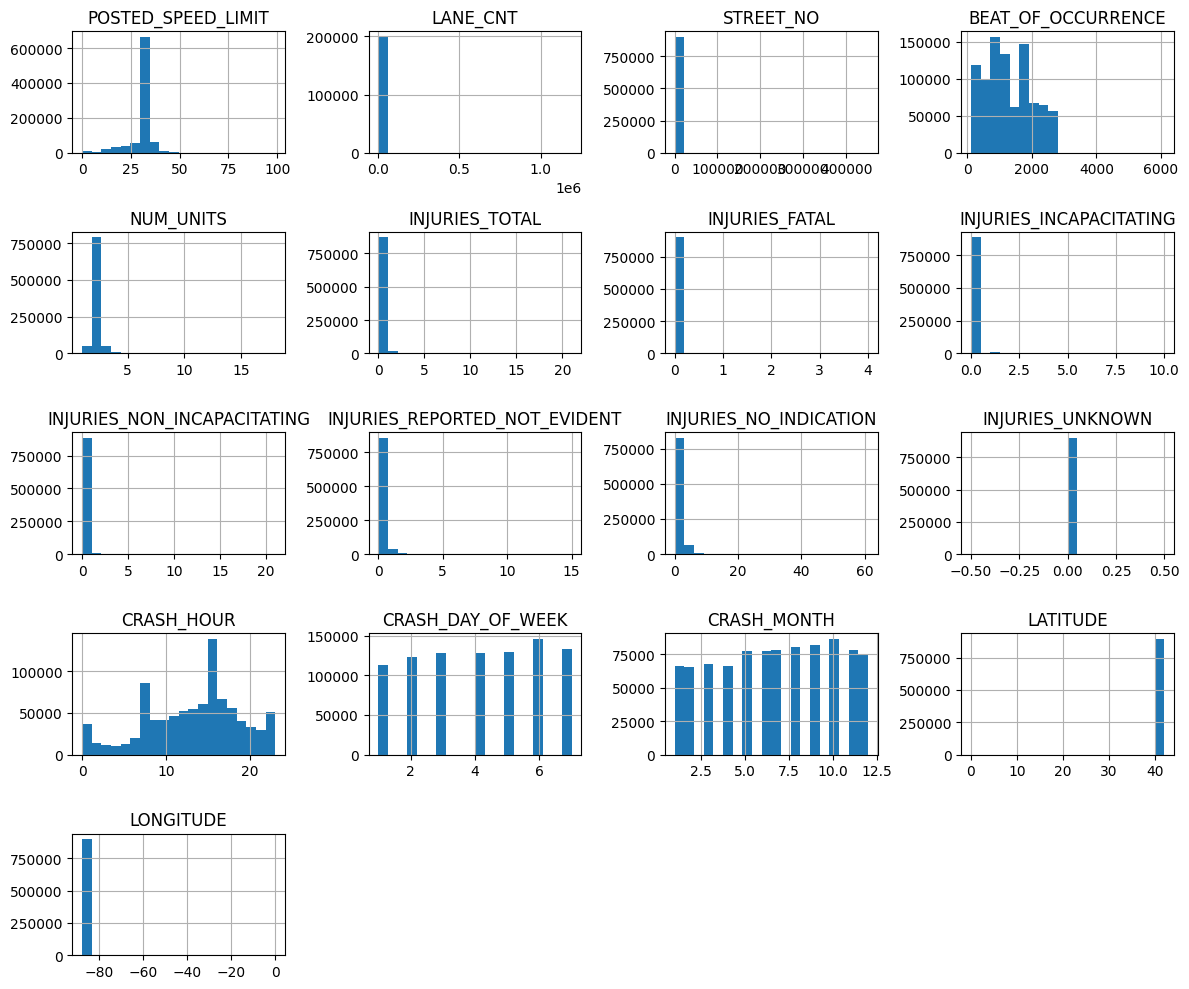

In [10]:
plot_histograms(traffic_crashes_df)

In [11]:
analyze_dates(traffic_crashes_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.2 People Dataset

In [12]:
# Data understanding for People dataset

people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [13]:
#
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979859 entries, 0 to 1979858
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [14]:
(people_df.isna().sum()/len(people_df))*100

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                2.053177
CRASH_DATE                0.000000
SEAT_NO                  79.779722
CITY                     27.234616
STATE                    26.128325
ZIPCODE                  33.053566
SEX                       1.683908
AGE                      29.113487
DRIVERS_LICENSE_STATE    41.463912
DRIVERS_LICENSE_CLASS    51.340474
SAFETY_EQUIPMENT          0.278858
AIRBAG_DEPLOYED           1.975696
EJECTION                  1.256756
INJURY_CLASSIFICATION     0.037983
HOSPITAL                 83.806675
EMS_AGENCY               90.005854
EMS_RUN_NO               98.331901
DRIVER_ACTION            20.399685
DRIVER_VISION            20.430950
PHYSICAL_CONDITION       20.344782
PEDPEDAL_ACTION          98.038042
PEDPEDAL_VISIBILITY      98.041628
PEDPEDAL_LOCATION        98.038042
BAC_RESULT               20.352510
BAC_RESULT VALUE         99.890295
CELL_PHONE_USE      

In [ ]:
plot_histograms(people_df)

In [ ]:
analyze_dates(people_df, 'CRASH_DATE')

### 2.2.3 Vehicles Dataset

In [ ]:
# Data understanding for Vehicles dataset

vehicles_df.head()

In [ ]:
vehicles_df.info()

In [ ]:
(vehicles_df.isna().sum()/len(vehicles_df))*100

In [ ]:
plot_histograms(vehicles_df)

In [ ]:
analyze_dates(vehicles_df, 'CRASH_DATE')

### 2.2.4 Target Class

In [ ]:
injury_counts = traffic_crashes_df['MOST_SEVERE_INJURY'].value_counts()
injury_counts

In [ ]:
traffic_crashes_df['MOST_SEVERE_INJURY'].value_counts(normalize = True)


In [ ]:
# Creates the bar plot
#sns.set_theme(style="darkgrid")
#plt.figure(figsize=(8, 6))
#sns.barplot(x=injury_counts.index, y=injury_counts.values)

# Custom y-axis formatting to show values in 'k'
def y_axis_formatter(x, pos):
    
    """
    Format the y-axis labels to display values in 'k' (thousands).

    This function takes a numerical value (x) and converts it to a string representation 
    with a 'k' suffix, indicating that the number is in thousands. The function is intended 
    for use as a formatter in matplotlib plots to make large numbers easier to read.

    Args:
    x (float): The value to be formatted.
    pos (int): The position of the tick (not used in the formatting, but required by matplotlib's formatter interface).

    Returns:
    str: The formatted string with a 'k' suffix (e.g., "10k" for 10000).
    """
    
    # Dividing by 1000 to convert to "k"
    return f'{int(x / 1000)}k'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))

# Add titles and labels
plt.title('Distribution of Most Severe Injury in Crashes', fontsize=16)
plt.xlabel('Most Severe Injury', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=25, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Make specific x-axis labels bold and red
highlighted_labels = ['FATAL', 'INCAPACITATING INJURY']  
for label in plt.gca().get_xticklabels():
    if label.get_text() in highlighted_labels:
        label.set_fontweight('bold')
        label.set_color('red')

# Save the plot with a transparent background
plt.tight_layout()

# saving the visualization is commented out 
plt.savefig('images/most_severe_distribution.png', transparent=False)  

plt.show()

## 3. <a name ="Data-Preparation"></a> Data Preparation

For streamlined reproducibility, the data cleaning process was completed in `data_cleaning_notebook.ipynb`. The final cleaned dataset, `crashes_finalized_df`, has been uploaded to Kaggle for easy access.
<br><br>
**Final Cleaned Dataframe Overview**:
   * Subset of merged data from `crashes_df`, `people_df`, and `vehicles_df`
   * ***15***% random sample, keeping target class proportional with merged dataset
   * Total of approximately ***96k*** records and ***16*** features
   * Ready for modeling -- no null values

For more detailed information on my data cleaning steps and justifications, please refer to the data_cleaning_steps.py file.

To load the final trimmed and cleaned dataset from Kaggle, use the following code.

(Please be aware that running this code will require you to enter your kaggle username and API key. The code will not proceed if you do not provide accurate information.)

To create a kaggle account, [click here](https://www.kaggle.com/account/login). 

For more details on obtaining your kaggle API key, [click here](https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md).

In [ ]:
# Step 1: Get Kaggle username and key from user input or environment variables
os.environ["KAGGLE_USERNAME"] = input("Enter Kaggle username: ")
os.environ["KAGGLE_KEY"] = input("Enter Kaggle key: ")

# Detect the environment (Google Colab or local machine)
if 'google.colab' in str(get_ipython()):
    # For Google Colab, use the /root/.kaggle directory
    kaggle_path = Path('/root/.kaggle')
else:
    # For local machine, use the home directory
    kaggle_path = Path.home() / '.kaggle'

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_path, exist_ok=True)

# Create the kaggle.json file with the correct API credentials
kaggle_json = {
    "username": os.getenv("KAGGLE_USERNAME"),
    "key": os.getenv("KAGGLE_KEY")
}

# Write the kaggle.json file in the correct location
with open(kaggle_path / 'kaggle.json', 'w') as f:
    json.dump(kaggle_json, f)

# Set file permissions to secure the API key (optional but recommended)
os.chmod(kaggle_path / 'kaggle.json', 0o600)

# Check if the credentials are set correctly (for debugging purposes)
print("Kaggle credentials are set up successfully.")

In [ ]:
# Step 2: Download the dataset using Kaggle API

# Set dataset identifier and download path
dataset_identifier = 'ckucewicz/Chicago-Traffic-Data'
download_path = Path('./data')  # Local or Colab download folder

# Ensure the download path exists
os.makedirs(download_path, exist_ok=True)

# Detect the environment and run the appropriate download command
if 'google.colab' in str(get_ipython()):
    print("Downloading dataset in Google Colab...")
    !kaggle datasets download -d {dataset_identifier} --path {download_path}
else:
    print("Downloading dataset in Jupyter Notebook...")
    os.system(f"kaggle datasets download -d {dataset_identifier} --path {download_path}")

In [ ]:
# Step 3: Unzip the dataset
zip_filename = download_path / 'Chicago-Traffic-Data.zip'  # Adjust the ZIP filename
unzip_path = download_path / 'Chicago-Traffic-Data'

# Ensure the extraction path exists
os.makedirs(unzip_path, exist_ok=True)

# Unzip the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
    print(f"Dataset extracted to: {unzip_path}")
except FileNotFoundError:
    print(f"Error: {zip_filename} not found. Ensure the dataset was downloaded successfully.")

In [ ]:
# Step 4: Load the cleaned dataset CSV into pandas DataFrame
cleaned_csv = 'crashes_finalized_df.csv'  # The name of your cleaned dataset file
cleaned_df_path = unzip_path / cleaned_csv  # Full path to the cleaned dataset

try:
    # Load CSV into pandas DataFrame
    crashes_finalized_df = pd.read_csv(cleaned_df_path)
    print("Cleaned DataFrame loaded successfully.")

except FileNotFoundError:
    print(f"Error: {cleaned_csv} not found in the extracted files.")

In [ ]:
crashes_finalized_df.head()

In [ ]:
crashes_finalized_df.info()

In [ ]:
# Select all columns except the target column
columns_to_convert = [col for col in crashes_finalized_df.columns if col != 'severity_category']

# Convert the selected columns to category type
crashes_finalized_df[columns_to_convert] = crashes_finalized_df[columns_to_convert].apply(lambda x: x.astype('category'))

# Optionally, check the types
print(crashes_finalized_df.dtypes)

In [ ]:
 crashes_finalized_df.isna().sum()

In [ ]:
crashes_finalized_df.severity_category.value_counts(normalize = True)

In [ ]:
crashes_finalized_df.severity_category.value_counts()

In [ ]:
# Counts the occurrences of each category
severity_counts = crashes_finalized_df.severity_category.value_counts()

# Creates the bar plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts)

# Custom y-axis formatting to show values in 'k'
def y_axis_formatter(x, pos):
    return f'{int(x / 1000)}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))

# Adds titles and labels
plt.title('Target Class Distribution', fontsize=16)
plt.xlabel('Severity Category', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotates x-axis labels
plt.xticks(ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add a legend/key to clarify what the severity categories represent
plt.legend(['Serious Injury (1)', 'Non-serious Injury (0)'], loc='upper right', title='Severity Category', fontsize=12)

# Save the plot with a transparent background
plt.tight_layout()

# saving the visualization is commented out 
plt.savefig('images/target_distribution.png', transparent=False)

plt.show()

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis (EDA)

In [ ]:
def feature_analysis_and_plot(crashes_df, feature, custom_labels=None, save_viz=False, save_path="./images/feature_distribution_plot.png"):
    """
    Creates a pivot table and then plots the comparison of a specified feature's distribution in serious injuries vs total injuries.
    
    Parameters:
    - crashes_df: DataFrame containing crash data
    - feature: The column name (as a string) in the DataFrame for which the distribution will be shown and plotted
    - custom_labels: Optional dictionary to map feature values to custom labels (e.g., { 'm': 'Male', 'f': 'Female' })
    - save_viz: Boolean flag to save the plot as a file (default is False, not saved)
    - save_path: File path for saving the plot (default is "feature_distribution_plot.png")
    
    Returns:
    - None: Displays the pivot table and the plot
    """
    # Filter data to only include serious injuries (severity_category = 1)
    serious_injuries_df = crashes_df[crashes_df['severity_category'] == 1]

    # Calculate the percentage distribution for the specified feature in serious injuries
    serious_feature_distribution = serious_injuries_df[feature].value_counts(normalize=True)

    # Calculate the percentage distribution for the specified feature in all crashes
    total_feature_distribution = crashes_df[feature].value_counts(normalize=True)

    # Combine the distributions into a single DataFrame for comparison
    feature_distribution = pd.DataFrame({
        'Total Injuries (%)': total_feature_distribution,
        'Serious Injuries (%)': serious_feature_distribution
    })

    # If custom labels are provided, apply them to the index (x-axis categories)
    if custom_labels:
        feature_distribution.index = feature_distribution.index.map(custom_labels)

    # Create a pivot table with the feature categories as the index and columns as Total and Serious Injuries
    pivot_table = feature_distribution

    # Display the pivot table as percentages (optional formatting step)
    pivot_table = pivot_table * 100  # Convert to percentage

    # Round the percentages to 1 decimal place
    pivot_table = pivot_table.round(1)

    # Format the feature name in title case and split by underscores
    formatted_feature_name = ' '.join(feature.split('_')).title()

    # Print a more descriptive message before the pivot table
    print(f"{formatted_feature_name} Distribution Percentages:")
    print(pivot_table)

    # Plot the data
    ax = feature_distribution.plot(kind='bar', figsize=(10, 6), width=0.8, color=['lightgrey', 'gold'])

    # Set background color to white
    ax.set_facecolor('white')

    # Adding titles and labels
    plt.title(f"Comparison of {formatted_feature_name} Distribution: Serious Injuries vs Total Injuries", fontsize=20)
    plt.xlabel(formatted_feature_name, fontsize=16)
    plt.ylabel("Percentage", fontsize=16)
    plt.xticks(rotation=30, fontsize=16)
    plt.yticks(fontsize=16)

    # Format y-axis labels as percentages
    formatter = FuncFormatter(lambda x, _: f'{x*100:.0f}%')  # Multiply by 100 to convert to percentage
    ax.yaxis.set_major_formatter(formatter)

    # Display the plot
    plt.tight_layout()
    
    # If save_viz is True, save the plot as a PNG file
    if save_viz:
        plt.savefig(save_path, format='png', bbox_inches='tight')
        print("")
        print(f"Plot saved as {save_path}")
    
    # Show the plot
    plt.show()



In [ ]:
# pivot table and visualization for airbag_deployed feature

feature_analysis_and_plot(crashes_finalized_df, 'airbag_deployed', save_viz=False)


In [ ]:
# pivot table and visualization for sex feature

feature_analysis_and_plot(crashes_finalized_df, 'sex', save_viz=True, save_path="./images/sex_distribution_plot.png")

In [ ]:
# pivot table and visualization for age_group feature
feature_analysis_and_plot(crashes_finalized_df, 'age_group', save_viz=False, save_path="sex_distribution_plot.png")

In [ ]:
# pivot table and visualization for speed_limit_category feature
feature_analysis_and_plot(crashes_finalized_df, 'speed_limit_category', save_viz=True, save_path="./images/speed_category_distribution_plot.png")

In [ ]:
# pivot table and visualization for road category feature
feature_analysis_and_plot(crashes_finalized_df, 'road_category', save_viz=False)

In [ ]:
# pivot table and visualization for vehicle_category feature
feature_analysis_and_plot(crashes_finalized_df, 'vehicle_category', save_viz=True, save_path="./images/vehicle_distribution_plot.png")

In [ ]:
# pivot table and visualization for crash_cause_category feature
feature_analysis_and_plot(crashes_finalized_df, 'crash_cause_category', save_viz=True, save_path="./images/crash_cause_distribution_plot.png")

In [ ]:
# List of features you want to analyze
features_to_analyze = [col for col in crashes_finalized_df.columns if col != 'severity_category']

# Create an empty list to store the differences and their corresponding feature categories
differences = []

for feature in features_to_analyze:
    # Filter data to only include serious injuries (severity_category = 1)
    serious_injuries_df = crashes_finalized_df[crashes_finalized_df['severity_category'] == 1]
    
    # Calculate the percentage distribution for the specified feature in serious injuries
    serious_feature_distribution = serious_injuries_df[feature].value_counts(normalize=True)
    
    # Calculate the percentage distribution for the specified feature in all crashes
    total_feature_distribution = crashes_finalized_df[feature].value_counts(normalize=True)
    
    # Calculate the percentage difference (serious injuries - total injuries)
    feature_categories = total_feature_distribution.index
    for category in feature_categories:
        if category in serious_feature_distribution.index:
            serious_pct = serious_feature_distribution[category]
            total_pct = total_feature_distribution[category]
            diff = serious_pct - total_pct  # Positive means overrepresented in serious injuries
            differences.append((feature, category, diff * 100))  # Store feature name, category, and percentage difference

# Convert the list to a DataFrame
diff_df = pd.DataFrame(differences, columns=['Feature', 'Category', 'Difference'])

# Filter out negative differences (we only care about overrepresented categories)
diff_df = diff_df[diff_df['Difference'] > 0]

# Sort the DataFrame by the 'Difference' column in descending order (highest differences first)
top_10_diff_df = diff_df.sort_values(by='Difference', ascending=False).head(10)

# Reverse the order of the categories for plotting
top_10_diff_df = top_10_diff_df.iloc[::-1]

# Plot the data
plt.figure(figsize=(10, 6))
ax = plt.barh(top_10_diff_df['Category'] + ' (' + top_10_diff_df['Feature'] + ')',
              top_10_diff_df['Difference'], color='gold')

# Get the current axes for formatting
ax = plt.gca()

# Set background color to white
ax.set_facecolor('white')

# Adding titles and labels
plt.title("Top 10 Overrepresented Factors in Serious Injuries", fontsize=18)
plt.xlabel("Percentage Difference (Serious Injuries - Total Injuries)", fontsize=14)
plt.ylabel("Feature Category", fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)

# Format x-axis labels as percentages
formatter = FuncFormatter(lambda x, _: f'{x:.0f}%')
ax.xaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()

# Save the plot as a PNG file if desired
save_viz = True  # Change this to False if you don't want to save the plot
if save_viz:
    plt.savefig("./images/top_10_overrepresented.png", format='png', bbox_inches='tight')
    print("Plot saved as top_10_overrepresented.png")

# Show the plot
plt.show();

## 5. <a name ="Modeling"></a>  Modeling

Steps:
* Train-test-split two times: 
    * initial split: train and test sets
    * second split: test and validation sets
    
    
* evaluation function


* create pipeline
    * includes preprocessing steps
    

* baseline logreg
    * proprocess
    * fit model
    * evaluate performance


In [ ]:
# identifying predictor variables and target
y = crashes_finalized_df[['severity_category']]
X = crashes_finalized_df.drop(columns = ['severity_category'], axis = 1)

# initial 80/20 split into train and remaining data (for test and validation)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state = 42, test_size = 0.2)

# split remaining 20% into 50/50 for test and validation
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, random_state = 42, test_size = 0.5)  

# Use ravel() to ensure 1D
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

### Building Evaluation Function

In [ ]:
def evaluate_pr_auc(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model's performance using PR AUC on train and test datasets, and plot the PR AUC curves.
    
    Parameters:
    - model: Trained classification model.
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    
    Returns:
    - Dictionary with PR AUC scores for train and test sets.
    """
    
    # Predict probabilities for train and test sets
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision, recall, and thresholds for train and test
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)
    
    # Calculate PR AUC for train and test
    pr_auc_train = auc(recall_train, precision_train)
    pr_auc_test = auc(recall_test, precision_test)
    
    # Plot the PR AUC curves
    plt.figure(figsize=(10, 7))
    
    # No-skill baseline (proportion of positive class in the dataset)
    no_skill_train = len(y_train[y_train == 1]) / len(y_train)
    no_skill_test = len(y_test[y_test == 1]) / len(y_test)
    plt.plot([0, 1], [no_skill_train, no_skill_train], linestyle='--', label='No Skill (Train)', color='gray')
    plt.plot([0, 1], [no_skill_test, no_skill_test], linestyle='--', label='No Skill (Test)', color='lightgray')
    
    # Add PR curves
    plt.plot(recall_train, precision_train, label=f'Train PR AUC = {pr_auc_train:.4f}', color='blue')
    plt.plot(recall_test, precision_test, label=f'Test PR AUC = {pr_auc_test:.4f}', color='red')
    
    # Plot settings
    plt.title('Precision-Recall (PR) Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()
    
    # Return PR AUC scores
    return {
        'PR AUC Train': round(pr_auc_train, 4),
        'PR AUC Test': round(pr_auc_test, 4)
    }

## Preprocessing Pipeline

In [ ]:
# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.copy()

# Identify numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.copy()

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to categorical features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False), categorical_features),
        
        # Apply StandardScaler to numerical features
        ('num', StandardScaler(), numerical_features)
    ])

### Baseline Models

#### Baseline Logistic Regression

In [ ]:
#  Creates a logistic regression model with preprocessing and model instantiation pipeline
pipeline_logreg_baseline = Pipeline(steps=[
    # Apply the preprocessing steps
    ('preprocessor', preprocessor),  
      # Instantiate the model
    ('classifier', LogisticRegression(solver='liblinear', C=1e16, random_state=42))
])

# Fit the model to the training data
pipeline_logreg_baseline.fit(X_train, y_train)

# generating predictions based on the training features
y_train_pred = pipeline_logreg_baseline.predict(X_train)

In [ ]:
# Evaluate the model
evaluate_pr_auc(pipeline_logreg_baseline, X_train, y_train, X_val, y_val)

In [ ]:
# generating predictions based on X_val
y_val_pred = pipeline_logreg_baseline.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

In [ ]:
# Access the Logistic Regression model from the pipeline
logreg_baseline_model = pipeline_logreg_baseline.named_steps['classifier']

# Get model coefficients and intercept
coefficients = logreg_baseline_model.coef_.flatten()  # Flatten the coefficients array for easier access
intercept = logreg_baseline_model.intercept_[0]

# Access the preprocessor and extract the feature names after preprocessing
preprocessor = pipeline_logreg_baseline.named_steps['preprocessor']
categorical_features = preprocessor.transformers_[0][1].get_feature_names_out()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
feature_names = np.concatenate([categorical_features, numerical_features])

# Create a DataFrame with the feature names and their corresponding coefficients
coef_df = pd.DataFrame(
    data = coefficients,
    index = feature_names,  # Use the feature names after one-hot encoding
    columns = ['Coefficient']  # Name the column as 'Coefficient'
)

# Add a column for the absolute value of the coefficients to sort by significance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(5)

# Display the intercept
print(f"Intercept: {intercept}")

# Display the sorted coefficients
coef_df_sorted

## Baseline Decision Tree

In [ ]:
#  Create a decision tree pipeline with preprocessing and model instantiation
pipeline_dt_baseline = Pipeline(steps=[
    # Apply the preprocessing steps
    ('preprocessor', preprocessor),  
      # Instantiate the model
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
])

In [ ]:
pipeline_dt_baseline.fit(X_train, y_train)

In [ ]:
# calls the function on the pipeline
evaluate_pr_auc(pipeline_dt_baseline, X_train, y_train, X_val, y_val)

In [ ]:
# generating predictions based on X_val
y_val_pred = pipeline_dt_baseline.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

### Addressing Class Imbalance through Sampling and Class Weights

In [ ]:
# 1. Logistic Regression + SMOTE
smote = SMOTE(random_state=42)
logreg_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(solver = 'liblinear', C = 1e16, random_state=42))
])

In [ ]:
# 2. Logistic Regression + SMOTE + Balanced class weights
logreg_smote_balanced = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(solver = 'liblinear', C = 1e16, class_weight='balanced', random_state=42))
])

In [ ]:
# 3. Decision Tree + SMOTE
decision_tree_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
])

In [ ]:
# 4. Decision Tree + SMOTE + Balanced class weights
decision_tree_smote_balanced = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', class_weight='balanced', random_state=42))
])

In [ ]:
# Create a list of models to iterate over
models = [
    ('Logistic Regression + SMOTE', logreg_smote),
    ('Logistic Regression + SMOTE + Balanced', logreg_smote_balanced),
    ('Decision Tree + SMOTE', decision_tree_smote),
    ('Decision Tree + SMOTE + Balanced', decision_tree_smote_balanced)
]

In [ ]:
# Initialize an empty list to store the PR AUC scores for each model
pr_auc_scores_list = []

# Loop through the models to calculate the PR AUC for train and validation sets
for model_name, model in models:
    # Train the model once
    model.fit(X_train, y_train)
    
    # Predict probabilities on the training set
    y_train_probs = model.predict_proba(X_train)[:, 1]
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
    pr_auc_train = auc(recall_train, precision_train)
    
    # Predict probabilities on the validation set
    y_val_probs = model.predict_proba(X_val)[:, 1]
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_probs)
    pr_auc_val = auc(recall_val, precision_val)
    
    # Append the results as a dictionary to the list
    pr_auc_scores_list.append({
        'Model': model_name,
        'Train PR AUC': pr_auc_train,
        'Val PR AUC': pr_auc_val
    })

# Convert the list of dictionaries into a DataFrame
pr_auc_df = pd.DataFrame(pr_auc_scores_list)

# Round the values to 4 decimal places
pr_auc_df[['Train PR AUC', 'Val PR AUC']] = pr_auc_df[['Train PR AUC', 'Val PR AUC']].round(4)

# Display the DataFrame
pr_auc_df

In [ ]:
# Ensure y_val is a 1D array (flattened)
y_val = np.array(y_val).flatten()  # Flatten if necessary

# Calculate the proportion of the positive class in y_val
no_skill = y_val.mean()

# Plot the PR AUC curve
plt.figure(figsize=(10, 8))

for model_name, model in models:
    # Predict probabilities on the validation set (no need to fit the model again)
    y_probs = model.predict_proba(X_val)[:, 1]  # Use X_val for predictions
    
    # Calculate precision, recall, and AUC
    precision, recall, _ = precision_recall_curve(y_val, y_probs)  # Use y_val for the ground truth
    pr_auc = auc(recall, precision)
    
    # Plot the PR AUC curve
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.2f})')

# Plot the no-skill line (reflecting class imbalance)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label=f'No Skill (Proportion = {no_skill:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall AUC for Different Models')
plt.legend(loc='upper right')
plt.grid(True)
plt.show();

### Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define custom class weights (adjust as needed)
class_weights = [
    {0: 1, 1: 5},   # Class 0 has normal weight, Class 1 has higher weight
    {0: 1, 1: 10},  # Class 1 gets an even higher weight
    {0: 1, 1: 50},  # Class 1 gets much higher weight
]

# Define parameters for GridSearchCV (tuning class_weight)
param_grid_logreg = {
    'classifier__class_weight': class_weights,  # Tune class_weight
}

param_grid_dtree = {
    'classifier__class_weight': class_weights,  # Tune class_weight
}


# GridSearchCV for Logistic Regression with SMOTE and custom class weights
grid_logreg = GridSearchCV(
    estimator=ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),  # Apply SMOTE for balancing
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    param_grid=param_grid_logreg,
    cv=5,  # Cross-validation splits
    scoring='average_precision',  
    n_jobs=-1,
    verbose=1
)

# GridSearchCV for Decision Tree with SMOTE and custom class weights
grid_dtree = GridSearchCV(
    estimator=ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),  # Apply SMOTE for class balancing
        ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
    ]),
    param_grid=param_grid_dtree,
    cv=5,  # Cross-validation splits
    scoring='average_precision', 
    n_jobs=-1,
    verbose=1
)

# Fit the grid searches
grid_logreg.fit(X_train, y_train)
grid_dtree.fit(X_train, y_train)

# Print best parameters and scores
print("Best Logistic Regression Params:", grid_logreg.best_params_)
print("Best Logistic Regression Score:", round(grid_logreg.best_score_, 4))

print("Best Decision Tree Params:", grid_dtree.best_params_)
print("Best Decision Tree Score:", round(grid_dtree.best_score_, 4))

## 6. <a name ="Evaluation"></a> Evaluation

The predictive performance of my models was generally low, with the best-performing baseline decision tree model achieving a PR AUC of 0.0956 on validation data (where a PR AUC score of 1 represents perfect performance). This could be due to significant class imbalance or suboptimal feature selection during the data preparation phase.

However, the main focus of this project was on model inference rather than predictive accuracy. The goal was to understand how the model makes predictions in order to help identify key contributing factors in serious (fatal or incapacitating) traffic crashes. Decision trees are ideal for this type of analysis because they are simple, interpretable, and provide insights into feature importance.

Entropy is a measure of the uncertainty or impurity in a dataset. When a decision tree splits the data based on a feature, it seeks to reduce the entropy in the resulting subsets. The more a feature helps to reduce uncertainty, the more important it is in making decisions. Information gain is the reduction in entropy when a feature is used to split the data. A higher information gain indicates that the feature is more effective at clarifying the target variable’s behavior.

The feature_importances_ attribute in decision trees ranks features based on how much they reduce entropy across the tree. Features with higher importance scores are those that provide more significant reductions in uncertainty, helping the model make more confident predictions. Unlike linear regression coefficients, feature importance scores in decision trees do not convey the direction or magnitude of the effect on the target variable, but instead reflect their contribution to reducing uncertainty.

Based on the decision tree model, the most important features for predicting serious car crashes were:
   1. **Airbag Deployment (‘Not Deployed’)**
   2. **Crash Cause Category (‘Unknown/Other’)**: Although significant in the model, this feature offers little actionable insight.
   3. **Sex (‘Male’)**
   4. **Seasonality (Summer, Winter, and Spring)**

I’ll elaborate on each of these features below, as they will inform the recommendations in the conclusion.

### Best Model: Decision Tree Baseline 

In [ ]:
# Predictions
y_pred = pipeline_dt_baseline.predict(X_test)
y_pred_proba = pipeline_dt_baseline.predict_proba(X_test)[:, 1]

print("PR AUC (Average Precision):", average_precision_score(y_test, y_pred_proba))

In [ ]:
# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate PR AUC
pr_auc = auc(recall, precision)

# Calculate the no-skill line (horizontal line)
no_skill = sum(y_test) / len(y_test)  # Proportion of positive cases in y_test

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='blue', linewidth=2)
plt.axhline(y=no_skill, color='red', linestyle='--', label=f'No Skill (Precision = {no_skill:.2f})')
plt.title('Precision-Recall Curve', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(alpha=0.3)
plt.show();

In [ ]:
# Access the Decision Tree model from the pipeline
dt_final_model = pipeline_dt_baseline.named_steps['classifier']

# Access the preprocessor from the pipeline
preprocessor = pipeline_dt_baseline.named_steps['preprocessor']

# Extract the feature names after preprocessing

# For categorical features, use get_feature_names_out() to get the encoded feature names
categorical_features = preprocessor.transformers_[0][1].get_feature_names_out()

# For numerical features, extract the columns directly from X_train
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Combine categorical and numerical features
feature_names = np.concatenate([categorical_features, numerical_features])

# Extract the feature importances from the decision tree model
feature_importances = dt_final_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importance scores
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Feature_Importance': np.round(feature_importances, 4)  # Use numpy round instead of built-in round
}).sort_values(by='Feature_Importance', ascending=False).reset_index(drop=True)

# Modify the 'Feature' column to contain only the part after the last '_'
feature_importances_df['Feature'] = feature_importances_df['Feature'].apply(
    lambda x: x.split('_')[-1]  # Get the part after the last '_'
)

# Create a column for the original feature name if it's encoded (e.g., "first_crash_type_pedestrian")
feature_importances_df['Original_Feature'] = feature_importances_df['Feature'].apply(
    lambda x: x.split('_')[0] if len(x.split('_')) > 1 else x
)

# Display the feature importances with their original names
pd.set_option('display.max_rows', None)  # No row limit
pd.set_option('display.width', None)     # No line width limit

In [ ]:
# Display the top 10 features based on feature_importances_
feature_importances_df[['Original_Feature', 'Feature', 'Feature_Importance']].head(10)

The table above lists the most important features contributing to the prediction of serious (fatal or incapacitating) car crashes based on the decision tree model. These features are ranked by their feature importance score, which indicates how much each feature contributes to reducing uncertainty (entropy) in the decision-making process of the model. 
* ***Airbag Deployment ('Not Deployed')*** is the most important feature. This indicates that the failure of airbags to deploy during a crash is a significant factor in predicting the severity of the crash.


* ***Crash Cause Category ('Unknown/Other')***: This feature is the second most important in the model. However, since it is labeled as “Unknown/Other,” it offers limited actionable insights for decision-making. Despite its usefulness to the model, the ambiguous nature of this category makes it unhelpful for generating specific, actionable recommendations.


* ***Sex ('Male')*** also holds notable importance, potentially reflecting differences in crash outcomes between male and female drivers.


* Seasonality features such as ***Summer, Winter, and Spring (season_Summer, season_Winter, season_Spring)*** suggest that the time of year has a moderate effect on the likelihood of serious crashes, with weather and road conditions likely playing a role.

These findings can be used to better understand the factors that contribute to serious crashes and to inform safety measures and prevention strategies.

In [ ]:
# Display the bottom 10 features based on feature_importances_
feature_importances_df[['Original_Feature', 'Feature', 'Feature_Importance']].tail(3)

The table below shows the least important features contributing to the prediction of serious (fatal or incapacitating) car crashes based on the decision tree model. These features have very low feature importance scores, indicating that they have minimal impact on the model’s decision-making process.

* ***Sex (sex_x)***: This feature represents a category for female drivers but has a very low feature importance score. This suggests that the model does not heavily rely on gender as a predictor of serious crashes in this case.


* ***Roadway Surface Condition (Other)***: This feature represents other types of roadway conditions but also contributes very little to the prediction of serious crashes.


* ***Roadway Surface Condition (Sand, Mud, Dirt)*** : This feature has a feature importance score of 0, indicating that the model found it to be irrelevant or uninformative in predicting serious crashes.

These features are considered less significant for the model’s predictions and may be candidates for further examination or removal in future iterations of the model, depending on the overall modeling goals and the inclusion of additional relevant data.

In [ ]:
# Plot the tree with a limited max depth for visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_final_model, 
          max_depth=3,  # Limit the depth of the plot (you can adjust this)
          filled=True, 
          feature_names=feature_importances_df['Feature'], 
          class_names=['Not Serious', 'Serious'], 
          rounded=True, 
          fontsize=12)
plt.show()

## 7. <a name ="Conclusion"></a> Conclusion

### 7.1 <a name ="Limitations"></a> Limitations

1. **Data Quality: Police-Reported Data**


The quality of the model heavily depends on the data used, which in this case comes from police-reported records. There are two main issues with this:

   * **Potential Implicit Bias**: Police reports can be influenced by implicit bias, which may skew the results.

   * **Subjectivity and Delayed Reporting**: Police often arrive after a crash has occurred, meaning their reports are based on second-hand accounts and can be subjective. Additionally, individuals involved in the crash may not always provide accurate information.
    

2. **Decision Tree Interpretation**


While decision trees excel at identifying important features and ranking them by their contribution to the model, they do not provide a direct understanding of the magnitude or direction of a feature’s effect on the target variable. Unlike linear regression, where changes in a predictor can be interpreted as affecting the target in a specific way (e.g., increasing by a set amount), decision trees offer an ordinal ranking of features but don’t give us insights into how changes in those features quantitatively affect the target variable.

3. **Computing and Time Constraints**


Due to the quick turnaround time for this project, the focus was on delivering a deployable minimum viable product. As a result, some decisions made during the data cleaning and modeling phases, such as feature selection, model choice, and hyperparameter tuning, were constrained by time. More time could have allowed for more refined selections and optimizations.

### 7.2 <a name ="Recommendations"></a> Recommendations

### 1. **Male Trends Analysis**:
The analysis revealed that males were disproportionately represented in serious injury crashes, accounting for **54.4**% of serious injuries despite comprising **47.8**% of total injuries. However, it’s important to note that the data does not distinguish whether males were the drivers or passengers in these situations.

#### **Recommendations**:

***Further Analysis***: Conduct additional research to determine whether this trend persists when focusing specifically on male drivers.

***Targeted Safety Campaign***: If the trend is verified for male drivers, develop a targeted safety campaign aimed at addressing behaviors linked to higher risk, such as speeding and aggressive driving. This campaign could utilize public service announcements, social media outreach, and partnerships with local organizations to encourage safer driving habits.
    

### 2. **Annual Airbag Inspections and Replacements**:
Airbag deployment was identified as the most important feature in predicting injury severity, highlighting its importance in crash safety. To ensure airbags function effectively, especially in older vehicles, regular inspection and maintenance are crucial.

#### **Recommendation**:
Advocate for policies requiring annual airbag inspections, ensuring they are functional and compliant with modern safety standards.


### 3. **Vehicle Size and Speed Regulations**:
One of the key findings of this analysis is that airbag deployment (or lack thereof) is a key contributing factor in the injury severity of a crash. Airbags deploy based on the force of impact, which is significantly influenced by vehicle speed and size. Larger, heavier vehicles such as trucks and SUVs contribute to more severe crashes due to the greater forces involved, increasing the likelihood of airbag deployment.

#### **Recommendations**:

**City-Specific Weight Fees**: Introduce a tiered fee system for parking permits or vehicle registrations within urban areas, where heavier personal vehicles like trucks and SUVs incur higher fees. This financial disincentive could encourage the use of smaller, safer, and more environmentally friendly vehicles in city settings.


**Revenue Allocation**: Allocate revenue from these fees to fund pedestrian and cyclist safety initiatives, such as traffic calming measures, better signage, and crash prevention campaigns.


**Speed-Limiting Systems**: Advocate for regulations that require or incentivize the use of speed-limiting technology in vehicles. These systems can restrict maximum vehicle speeds to safer limits, reducing the likelihood and severity of crashes.

### 7.3 <a name ="Next-Steps"></a> Next Steps


This raises a crucial question: How do we get drivers to slow down? The answer lies in addressing behavior change—a much more complex challenge. Several strategies have been implemented to reduce speed, from speed cushions to lower speed limits, narrower lanes, and increased police presence in high-speed areas, though debates continue over the most effective approaches.

## 8. <a name ="References"></a> References 

1. City of Philadelphia. (2024). *Vision Zero Annual Report 2024*. Philadelphia.gov. https://visionzerophl.com/plans-and-reports/annual-report-2024/


2. Chicago Department of Transportation (CDOT). (2024). *Chicago Annual Traffic Report 2024*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D


3. Vision Zero Network. (2024). *What is Vision Zero?* Vision Zero Network. https://visionzeronetwork.org/about/what-is-vision-zero/


4. Vision Zero Philadelphia. (n.d.). *Get involved*. Vision Zero Philadelphia. https://visionzerophl.com/get-involved/


5. Illinois Department of Transportation. (2024). *Illinois fatal crash data: 2024 snapshot*. Illinois Department of Transportation. https://apps.dot.illinois.gov/FatalCrash/snapshot.html


6. City of Chicago. (2017). *Vision Zero Action Plan 2017-2019*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D